In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Downloads/nyc_taxi_trip_duration.csv')

In [5]:
print('We have {} rows.'.format(df.shape[0]))
print('We have {} columns'.format(df.shape[1]))
df.iloc[1,:]

We have 729322 rows.
We have 11 columns


id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude               -73.988312
pickup_latitude                 40.731743
dropoff_longitude              -73.994751
dropoff_latitude                40.694931
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

In [6]:
np.sum(pd.isnull(df))

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
# converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

# Converting yes/no flag to 1 and 0
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')

df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

In [8]:
df['trip_duration'].describe()/3600 # Trip duration in hours

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

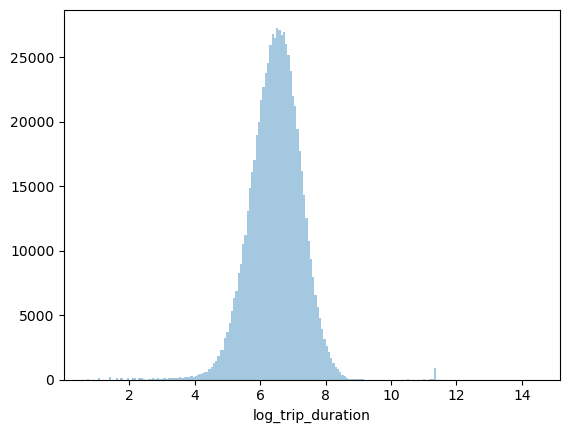

In [9]:
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = False, bins = 200)
plt.show()

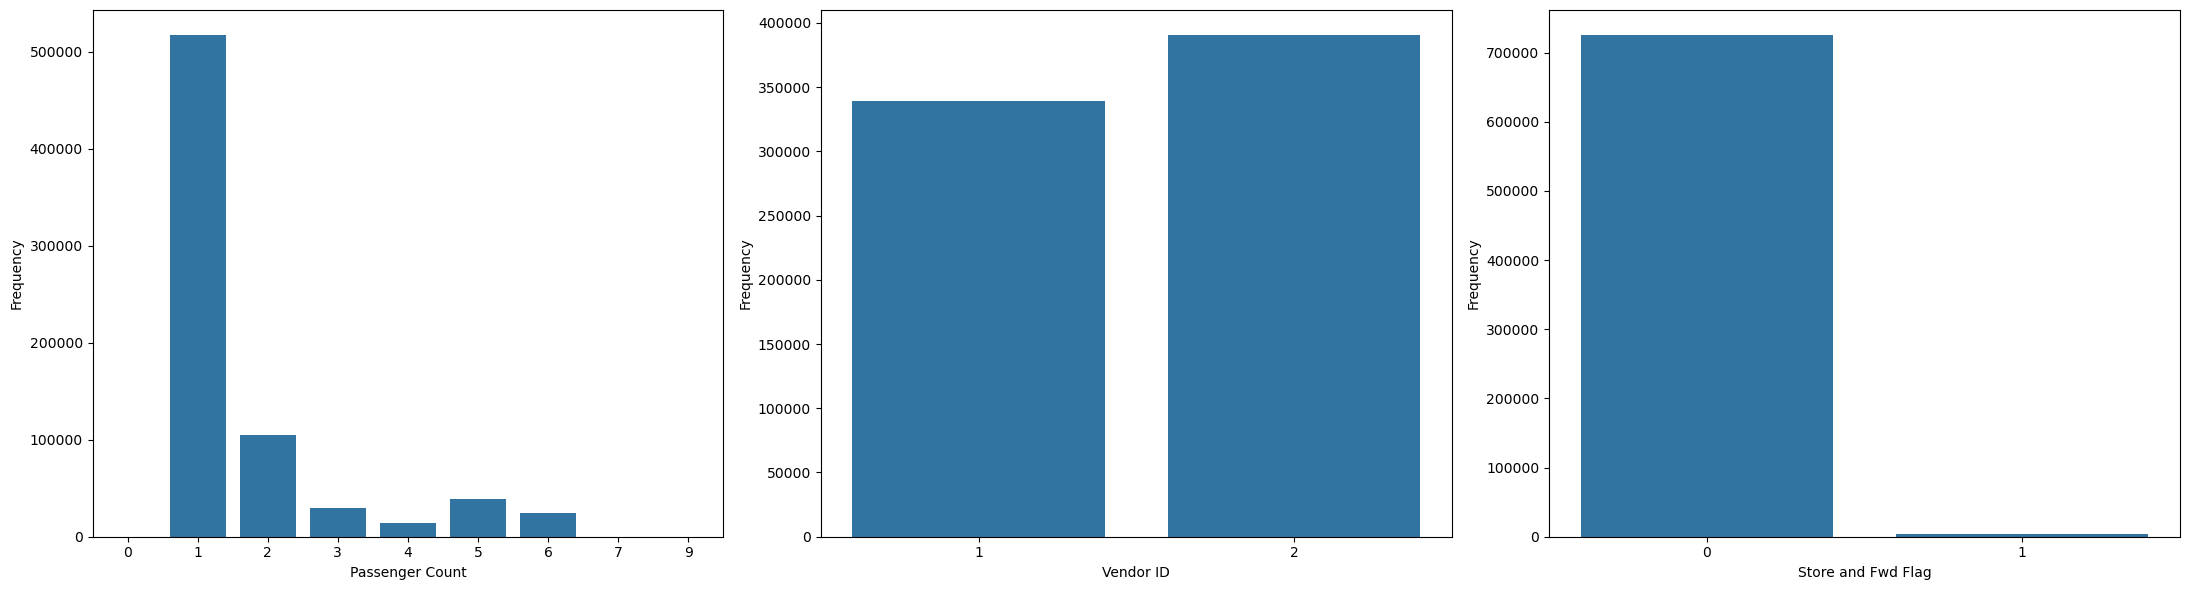

In [10]:
plt.figure(figsize=(22, 6))

# Passenger Count
plt.subplot(1, 3, 1)  # (rows, cols, index)
sns.countplot(x=df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

# Vendor ID
plt.subplot(1, 3, 2)
sns.countplot(x=df['vendor_id'])
plt.xlabel('Vendor ID')
plt.ylabel('Frequency')

# Store and Forward Flag
plt.subplot(1, 3, 3)
sns.countplot(x=df['store_and_fwd_flag'])
plt.xlabel('Store and Fwd Flag')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Binary Features
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')


In [11]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

In [12]:
df['day_of_week'] = df['pickup_datetime'].dt.weekday
df['hour_of_day'] = df['pickup_datetime'].dt.hour


# Datetime features
plt.figure(figsize=(22, 6))

# Passenger Count
plt.subplot(121)
sns.countplot(df['day_of_week'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(122)
sns.countplot(df['hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')


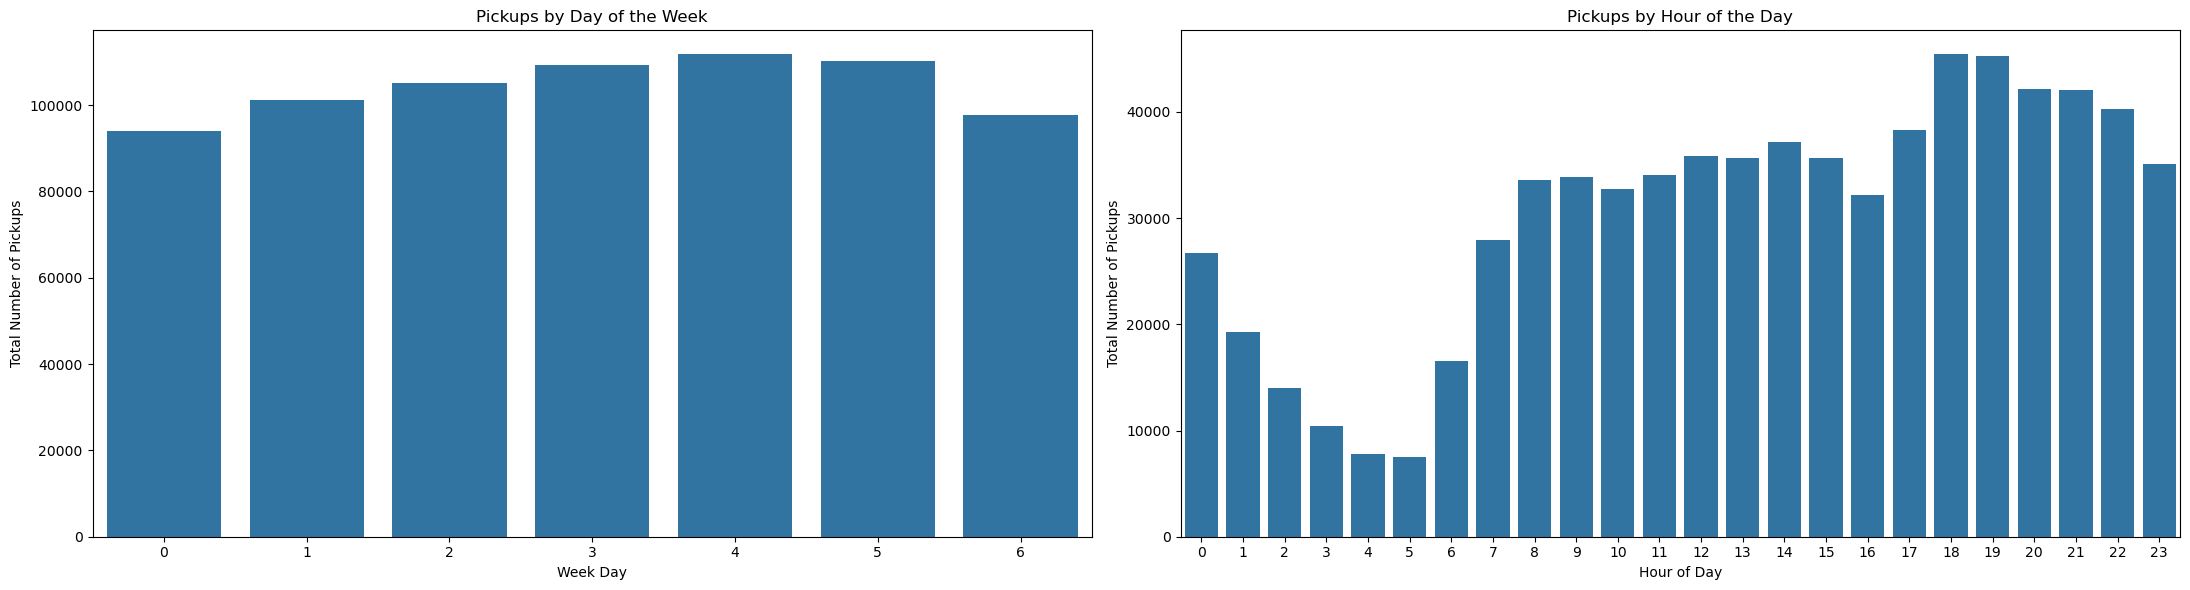

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22, 6))

# Weekday pickups
plt.subplot(1, 2, 1)
sns.countplot(x=df['day_of_week'], order=sorted(df['day_of_week'].unique()))
plt.xlabel('Week Day')
plt.ylabel('Total Number of Pickups')
plt.title('Pickups by Day of the Week')

# Hourly pickups
plt.subplot(1, 2, 2)
sns.countplot(x=df['hour_of_day'], order=sorted(df['hour_of_day'].unique()))
plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Pickups')
plt.title('Pickups by Hour of the Day')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


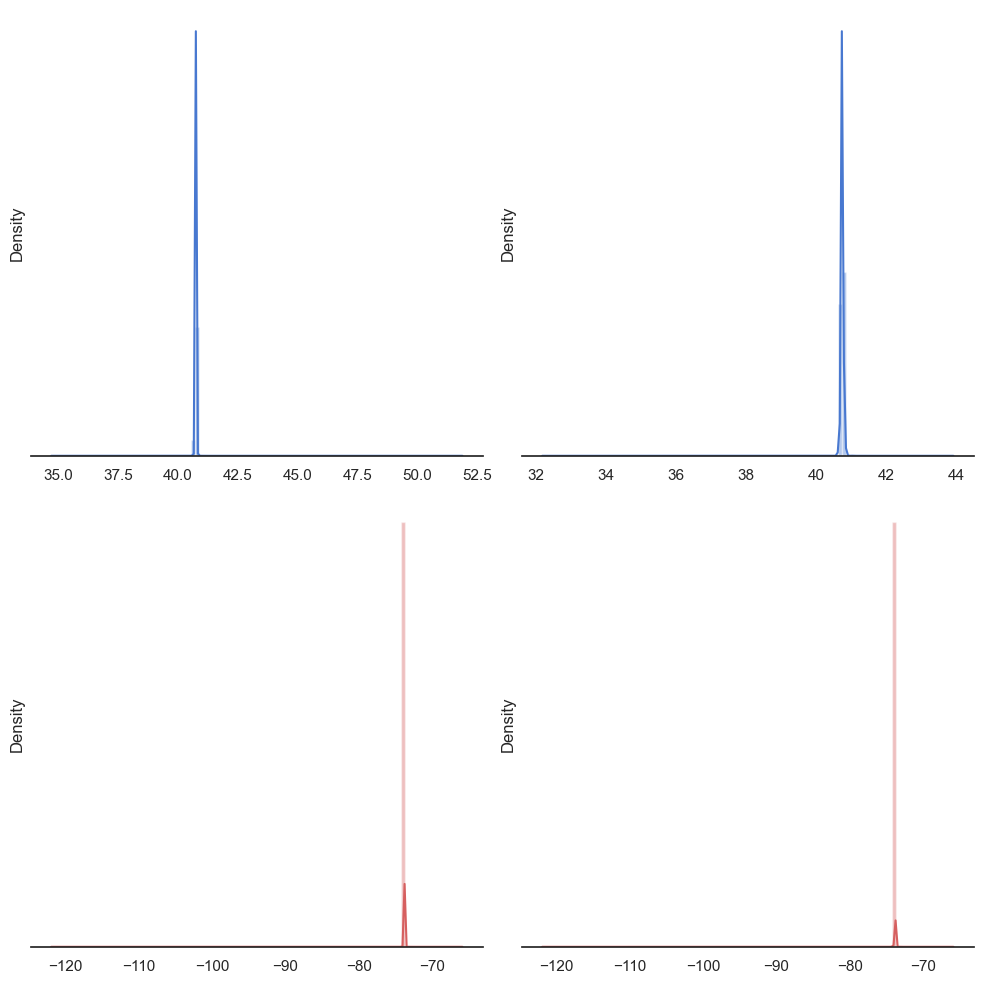

In [14]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

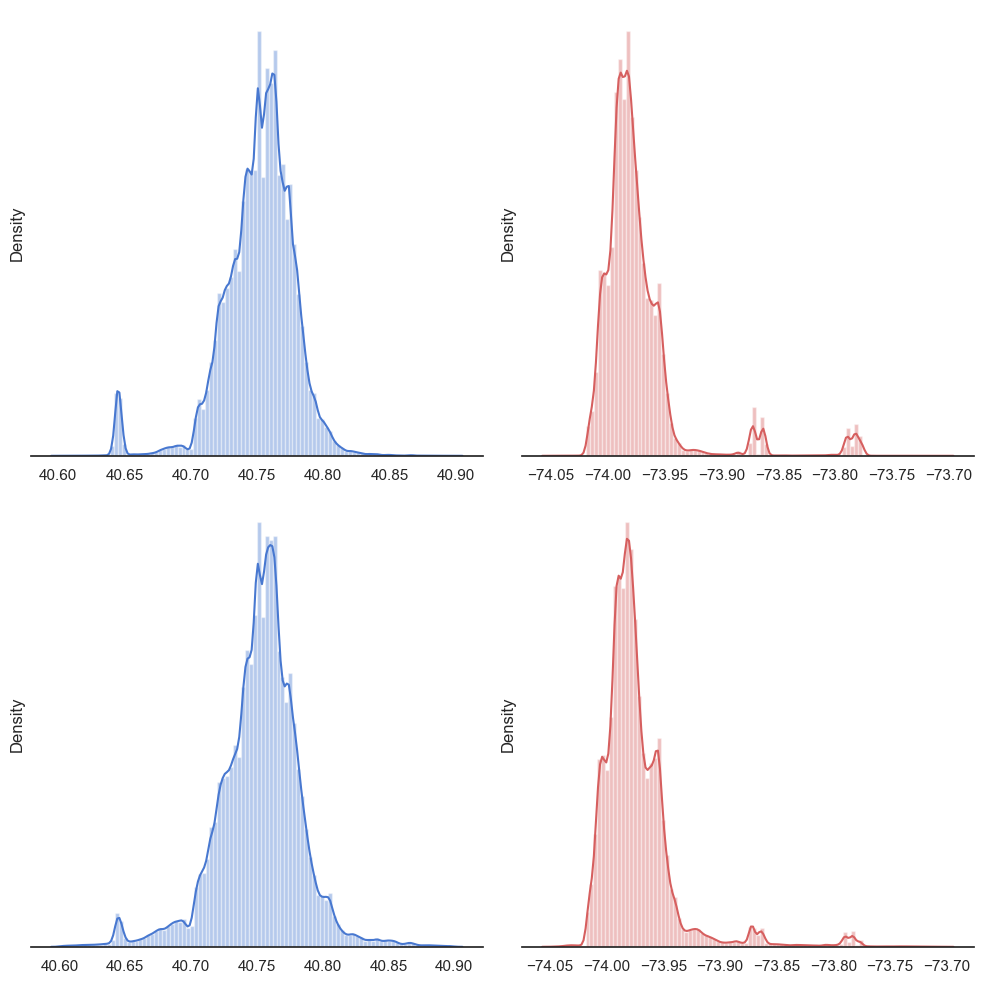

In [15]:
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

In [16]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'check_trip_duration', 'log_trip_duration',
       'day_of_week', 'hour_of_day'],
      dtype='object')

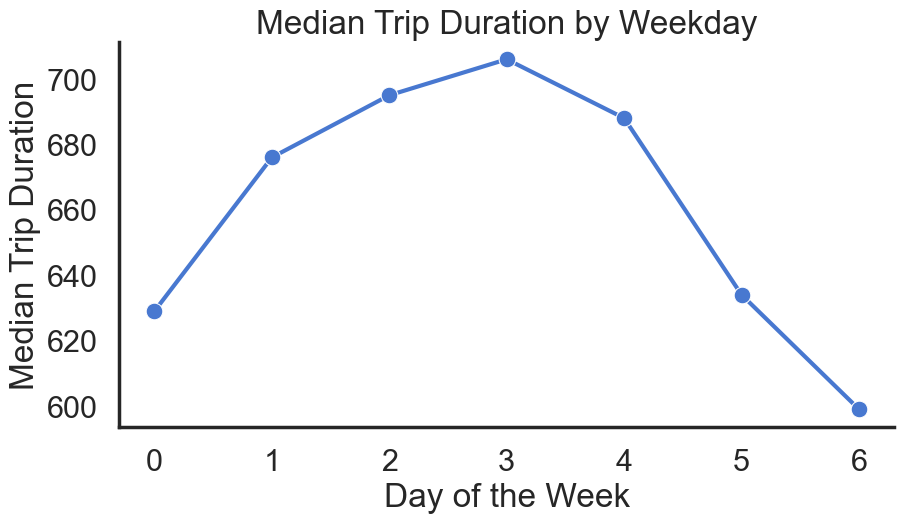

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate median trip duration per weekday
summary_wdays_avg_duration = df.groupby(['day_of_week'])['trip_duration'].median().reset_index()

# Set Seaborn styles
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")

# Line plot (replacing deprecated tsplot)
plt.figure(figsize=(10, 5))
sns.lineplot(x="day_of_week", y="trip_duration", data=summary_wdays_avg_duration, marker="o")

# Formatting
plt.xlabel("Day of the Week")
plt.ylabel("Median Trip Duration")
plt.title("Median Trip Duration by Weekday")
sns.despine(bottom=False)
plt.show()


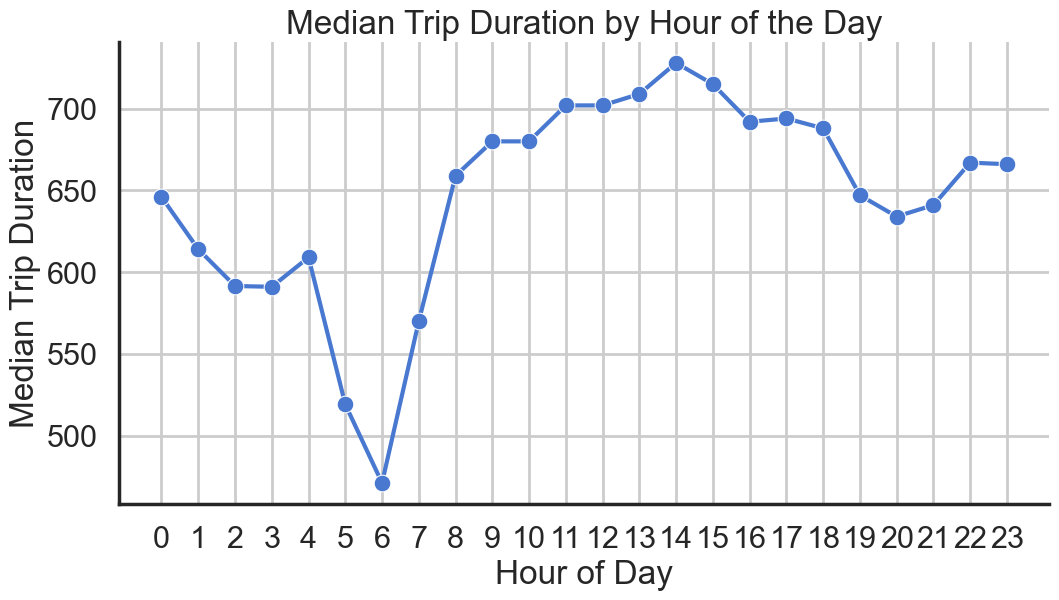

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate median trip duration per hour of the day
summary_hourly_avg_duration = df.groupby(['hour_of_day'])['trip_duration'].median().reset_index()

# Set Seaborn styles
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")

# Line plot (replacing deprecated tsplot)
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour_of_day", y="trip_duration", data=summary_hourly_avg_duration, marker="o")

# Formatting
plt.xlabel("Hour of Day")
plt.ylabel("Median Trip Duration")
plt.title("Median Trip Duration by Hour of the Day")
sns.despine(bottom=False)
plt.xticks(range(0, 24))  # Ensure all hours are visible on x-axis
plt.grid(True)

plt.show()


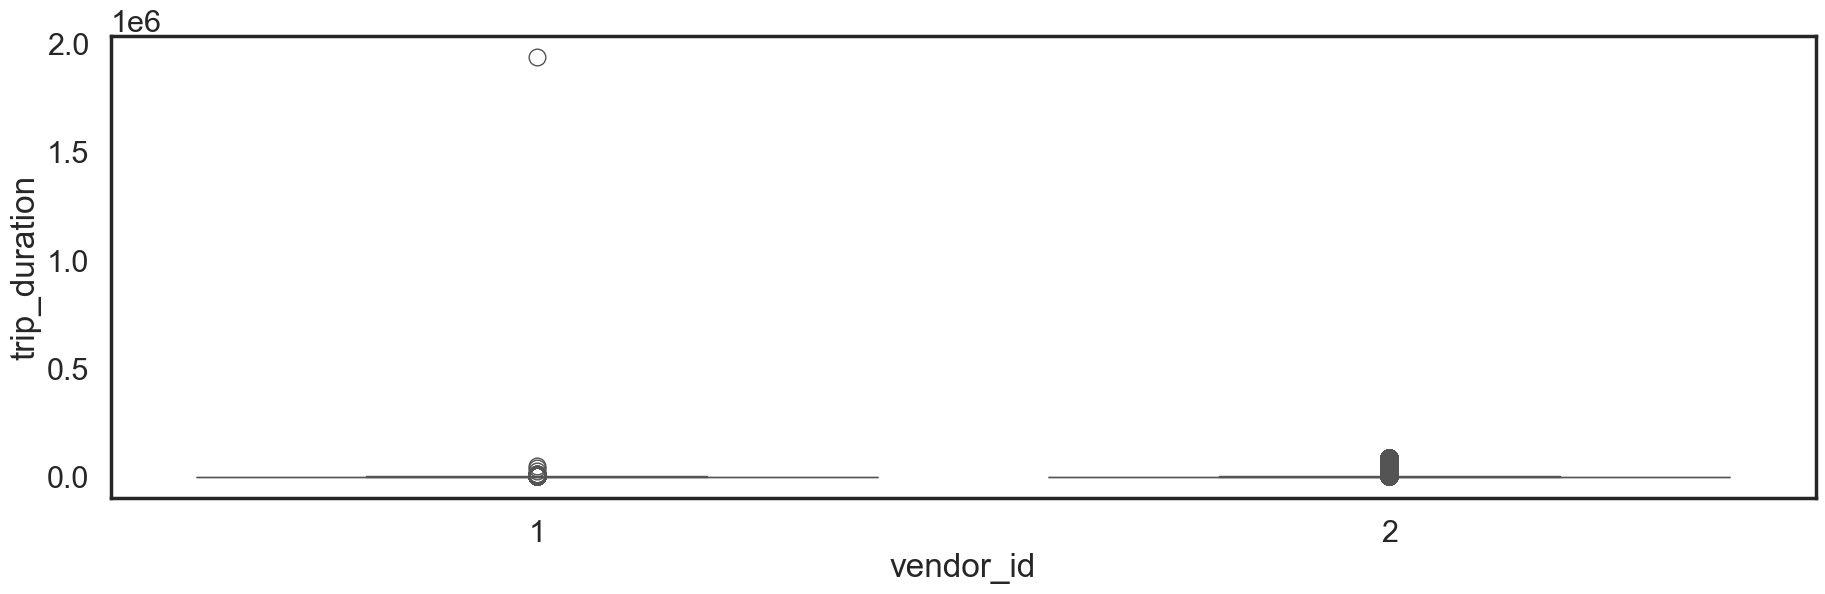

In [21]:
plt.figure(figsize=(22, 6))
sns.boxplot(x="vendor_id", y="trip_duration", data=df)
plt.show()

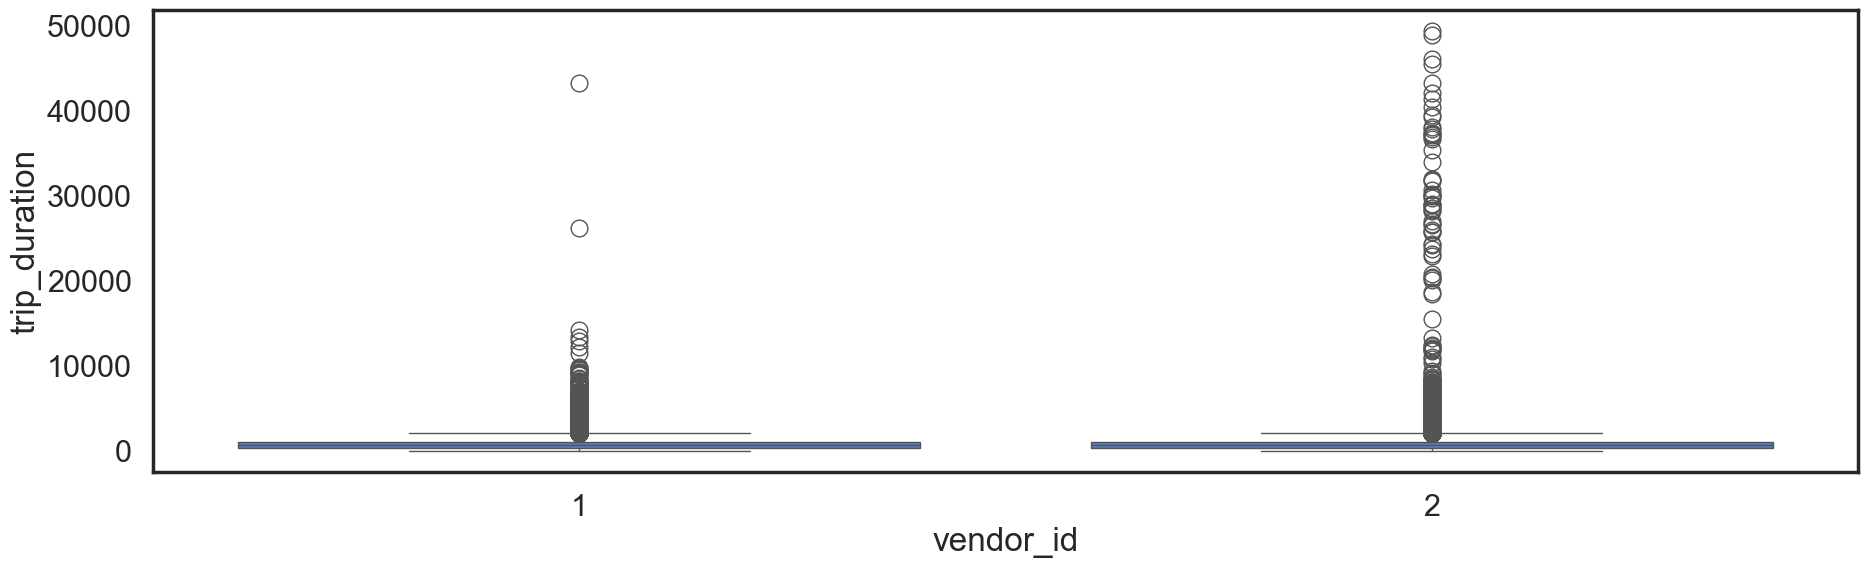

In [22]:
plt.figure(figsize=(22, 6))
df_sub = df[df['trip_duration'] < 50000]
sns.boxplot(x="vendor_id", y="trip_duration", data=df_sub)
plt.show()

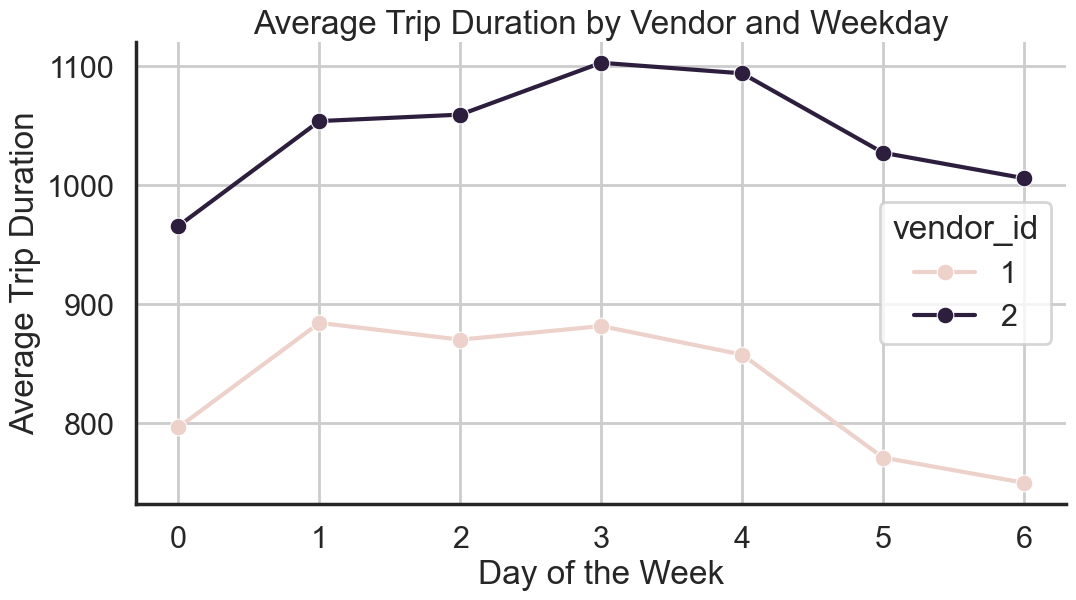

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean trip duration per vendor and weekday
summary_wdays_avg_duration = df.groupby(['vendor_id', 'day_of_week'])['trip_duration'].mean().reset_index()

# Set Seaborn styles
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")

# Line plot replacing deprecated tsplot
plt.figure(figsize=(12, 6))
sns.lineplot(x="day_of_week", y="trip_duration", hue="vendor_id", data=summary_wdays_avg_duration, marker="o")

# Formatting
plt.xlabel("Day of the Week")
plt.ylabel("Average Trip Duration")
plt.title("Average Trip Duration by Vendor and Weekday")
sns.despine(bottom=False)
plt.grid(True)

plt.show()


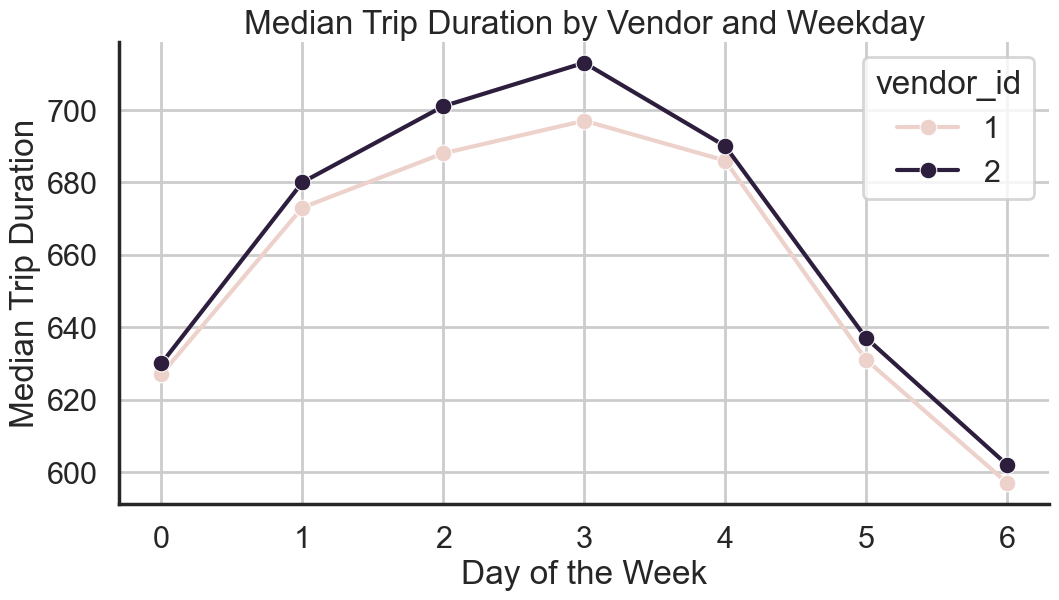

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate median trip duration per vendor and weekday
summary_wdays_avg_duration = df.groupby(['vendor_id', 'day_of_week'])['trip_duration'].median().reset_index()

# Set Seaborn styles
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")

# Line plot replacing deprecated tsplot
plt.figure(figsize=(12, 6))
sns.lineplot(x="day_of_week", y="trip_duration", hue="vendor_id", data=summary_wdays_avg_duration, marker="o")

# Formatting
plt.xlabel("Day of the Week")
plt.ylabel("Median Trip Duration")
plt.title("Median Trip Duration by Vendor and Weekday")
sns.despine(bottom=False)
plt.grid(True)

plt.show()


In [27]:
df.passenger_count.value_counts()

passenger_count
1    515243
2    104576
5     38776
3     29561
6     24035
4     13972
0        31
9         1
Name: count, dtype: int64

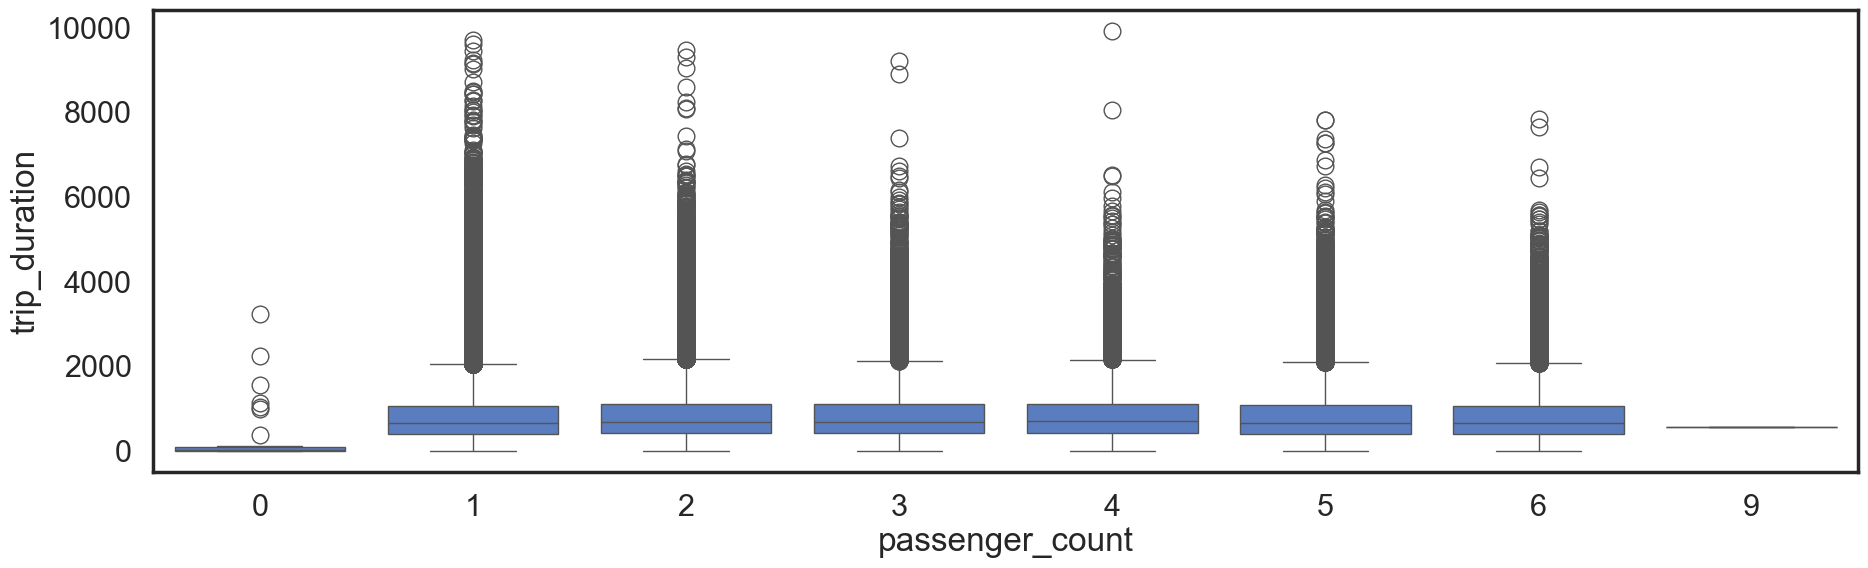

In [28]:
df.passenger_count.value_counts()
plt.figure(figsize=(22, 6))
df_sub = df[df['trip_duration'] < 10000]
sns.boxplot(x="passenger_count", y="trip_duration", data=df_sub)
plt.show()



In [31]:

rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
df_data_new['pick_lat_new'] = list(map(int, (df['pickup_latitude'] - (40.6000))*10000))
df_data_new['drop_lat_new'] = list(map(int, (df['dropoff_latitude'] - (40.6000))*10000))
df_data_new['pick_lon_new'] = list(map(int, (df['pickup_longitude'] - (-74.050))*10000))
df_data_new['drop_lon_new'] = list(map(int,(df['dropoff_longitude'] - (-74.050))*10000))

summary_plot = pd.DataFrame(df_data_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

summary_plot.reset_index(inplace = True)
summary_plot.head(120)
lat_list = summary_plot['pick_lat_new'].unique()
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//25) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 0
        elif (a//10)>0:
            rgb[i,j, 0] = 0
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 0
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 255
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off() 

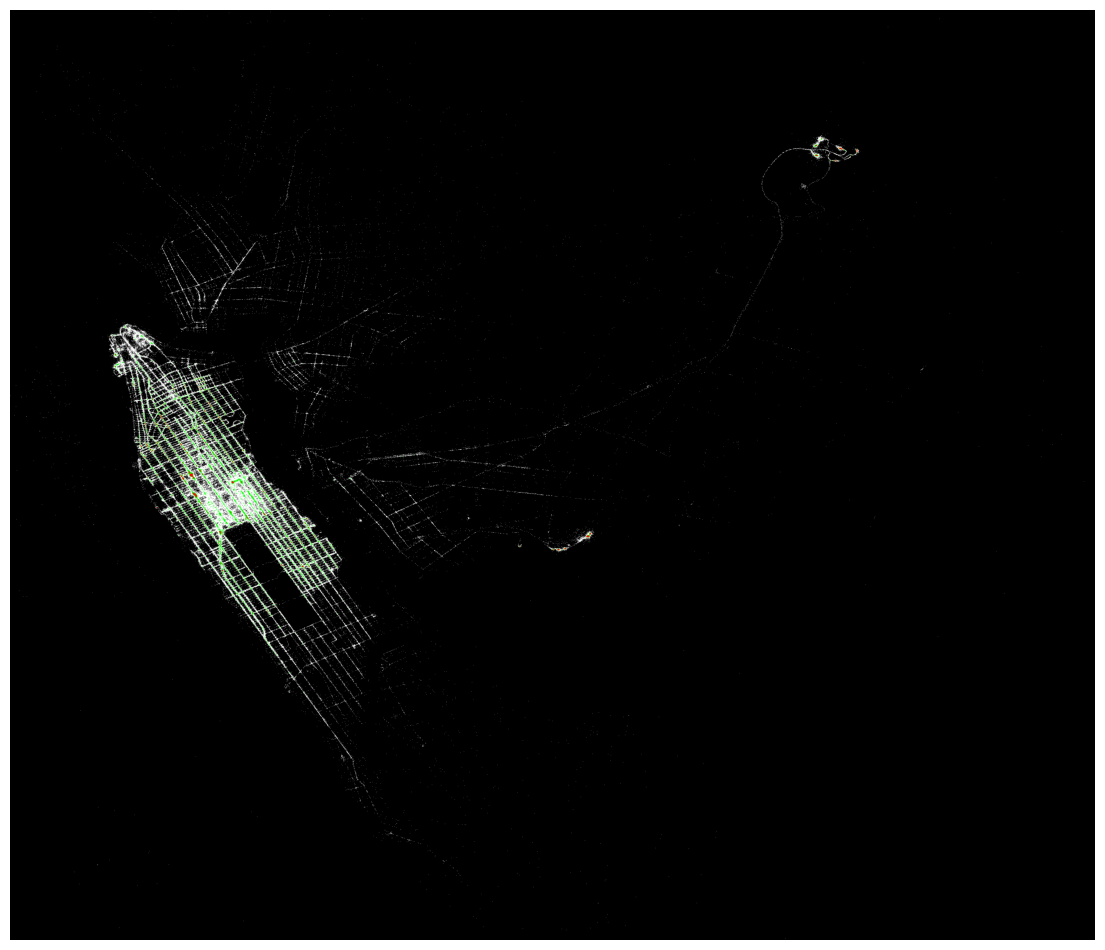

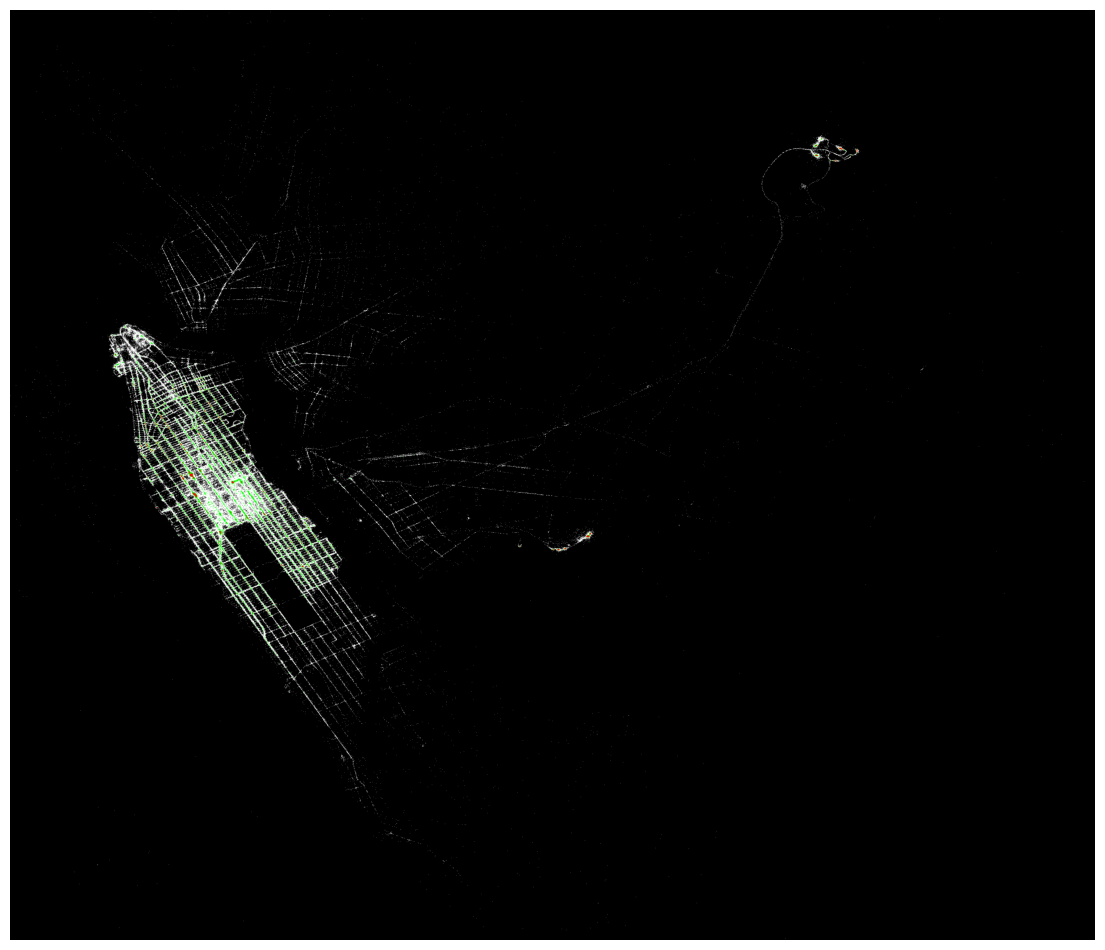

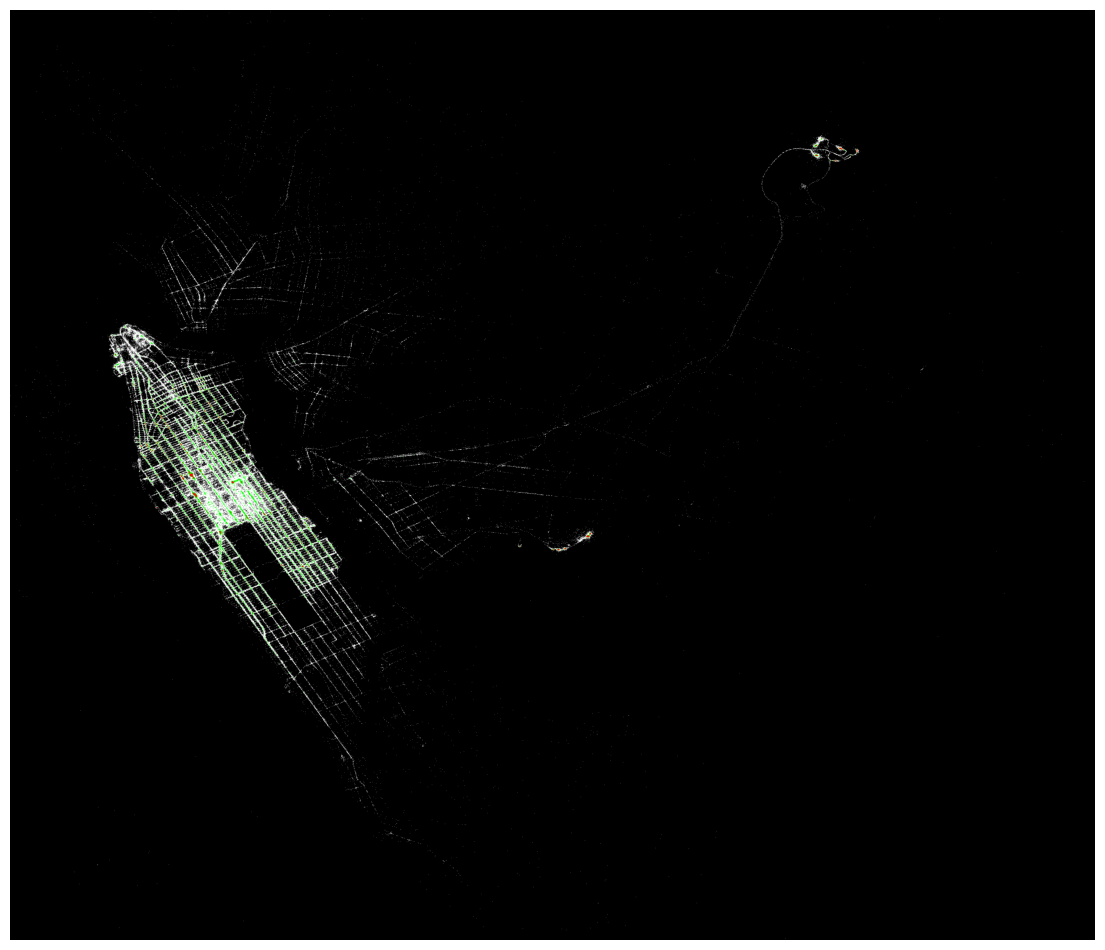

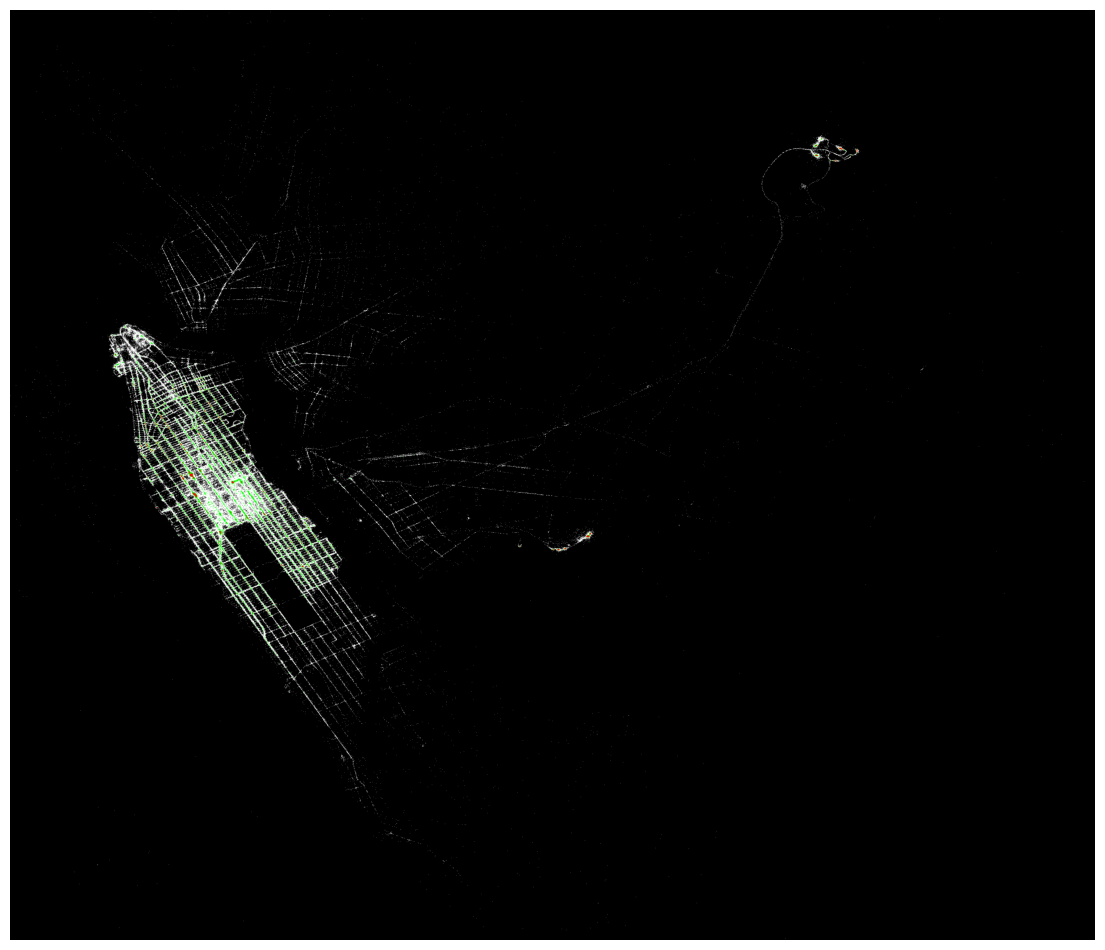

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Copy DataFrame to avoid modifying the original
df_data_new = df.copy()

# Initialize RGB Image (Black Background)
img_height, img_width = 3000, 3500
rgb = np.zeros((img_height, img_width, 3), dtype=np.uint8)

# Normalize and scale latitude/longitude
df_data_new['pick_lat_new'] = ((df['pickup_latitude'] - 40.6000) * 10000).astype(int)
df_data_new['pick_lon_new'] = ((df['pickup_longitude'] - (-74.050)) * 10000).astype(int)

# Group by new latitude/longitude coordinates and count occurrences
summary_plot = df_data_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count().reset_index()

# Ensure indices are within valid range
summary_plot = summary_plot[(summary_plot['pick_lat_new'] >= 0) & (summary_plot['pick_lat_new'] < img_height)]
summary_plot = summary_plot[(summary_plot['pick_lon_new'] >= 0) & (summary_plot['pick_lon_new'] < img_width)]

# Plot data onto the RGB array
for _, row in summary_plot.iterrows():
    i, j, count = row['pick_lat_new'], row['pick_lon_new'], row['id']
    
    if count // 25 > 0:
        rgb[i, j] = [255, 0, 0]  # Red
    elif count // 10 > 0:
        rgb[i, j] = [0, 255, 0]  # Green
    else:
        rgb[i, j] = [255, 255, 255]  # White

# Display the image
fig, ax = plt.subplots(figsize=(14, 20))
ax.imshow(rgb)
ax.set_axis_off()  # Hide axes
plt.show()


In [34]:
plt.figure(figsize=(12, 6))
df = df.drop(['id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count','check_trip_duration','log_trip_duration'],
        axis=1)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

KeyError: "['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'check_trip_duration', 'log_trip_duration'] not found in axis"

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop unwanted columns (create a copy to avoid modifying original DataFrame)
df_cleaned = df.drop(['id', 'pickup_datetime', 'dropoff_datetime',
                      'passenger_count', 'check_trip_duration', 'log_trip_duration'], axis=1).copy()

# Convert categorical features to numerical using factorization
for col in df_cleaned.select_dtypes(include=['object', 'category']).columns:
    df_cleaned[col] = pd.factorize(df_cleaned[col])[0]

# Compute correlation
corr = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True, fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()


KeyError: "['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'check_trip_duration', 'log_trip_duration'] not found in axis"

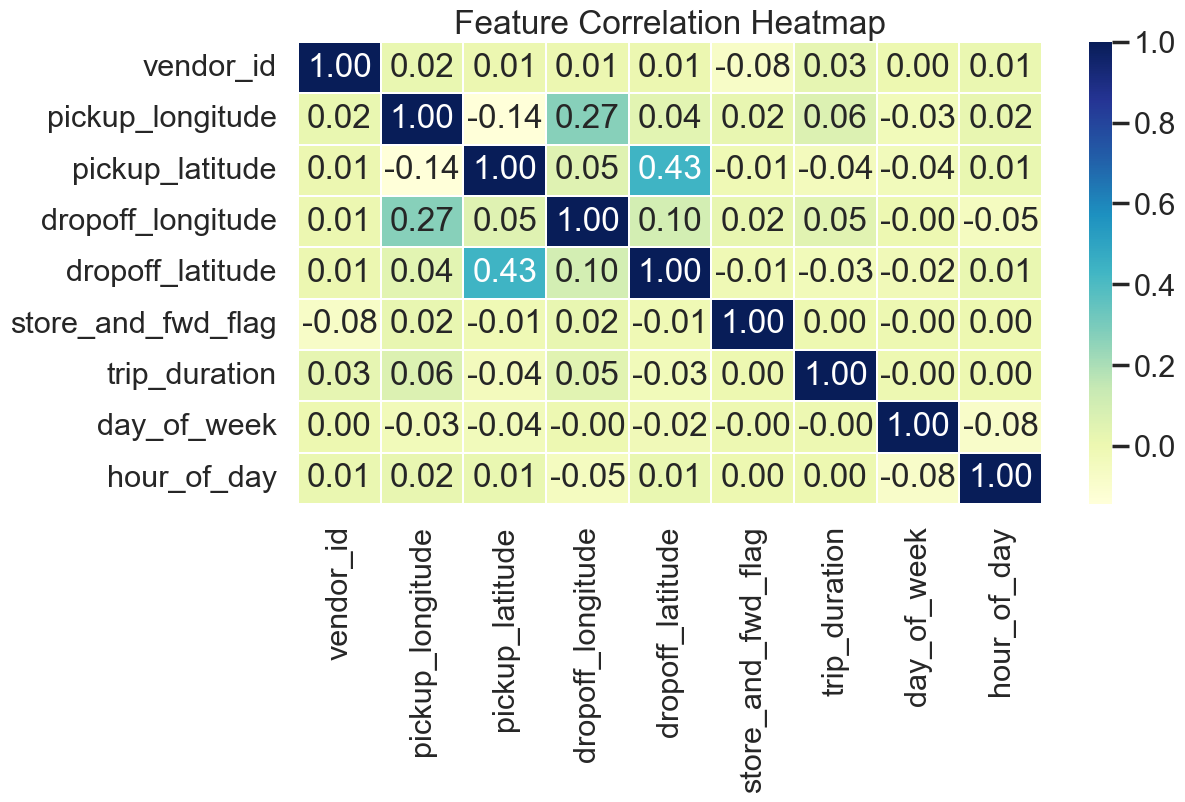

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to drop
drop_cols = ['id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 
             'check_trip_duration', 'log_trip_duration']

# Keep only the columns that exist in the DataFrame
existing_cols = [col for col in drop_cols if col in df.columns]
df_cleaned = df.drop(columns=existing_cols).copy()

# Convert categorical features to numerical using factorization
for col in df_cleaned.select_dtypes(include=['object', 'category']).columns:
    df_cleaned[col] = pd.factorize(df_cleaned[col])[0]

# Compute correlation
corr = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True, fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()
